In [29]:
import pickle;
import numpy as np;
from numpy.linalg import pinv;
from numpy.polynomial.legendre import legvander;
import tensorflow as tf

import control

In [30]:
%matplotlib inline

In [31]:
import cvxopt;
import cvxpy;


In [35]:
with_control = 0;

sess = tf.InteractiveSession();

saver = tf.train.import_meta_graph('sim_toggle_switch.pickle.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'));

psiyp = tf.get_collection('psiyp')[0];
psiyf = tf.get_collection('psiyf')[0];
forward_prediction = tf.get_collection('forward_prediction')[0];
yp_feed = tf.get_collection('yp_feed')[0];
yf_feed = tf.get_collection('yf_feed')[0];

#psiu = tf.get_collection('psiu')[0];
#u_control = tf.get_collection('u_control')[0];

Kx = tf.get_collection('Kx')[0];
#Ku = tf.get_collection('Ku')[0];

Kx_num = sess.run(Kx);
#Ku_num = sess.run(Ku);
A = np.transpose(Kx_num); # Kx_num and Ku_num were defined using row multi. 
#B = np.transpose(Ku_num);
C = np.eye(A.shape[0]);
#D = np.zeros((A.shape[0],B.shape[1]));
#sys = control.ss(A,B,C,D);
#print control.ctrb(A,B)


#print np.linalg.matrix_rank(control.ctrb(A,B))
#print control.ctrb(A,B).shape
#print yp_feed.get_shape



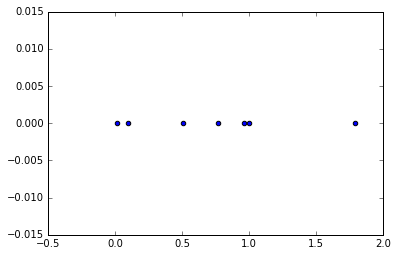

In [36]:
D,V = np.linalg.eig(Kx_num)
import matplotlib.pyplot as plt; 
%matplotlib inline 
plt.scatter(np.real(D),np.imag(D))



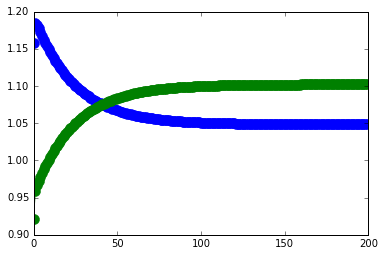

In [66]:
num_steps = 200; 
bas_obs = 2; 
phys_init_cond =np.random.rand(1,2);
temp_phys_cond = phys_init_cond; 
state_traj = np.zeros((num_steps,bas_obs));
for ind in range(0,num_steps):
    temp_phys_cond = sess.run(forward_prediction,feed_dict={yp_feed:temp_phys_cond[:,0:2]});
    
    state_traj[ind,0:] = temp_phys_cond[:,0:2];
    
#np.matmul(Kx_num, 
plt.plot(state_traj,'.-',markersize=20)

In [67]:
#scipy.io.savemat('h2synthesis/state_space_model.mat',mdict={'A':A,'B':B,'C':C}) #Av,Bv,Cv
#file_obj = file('h2synthesis/controller_matrices.pickle','wb');
#pickle.dump([A,B,C],file_obj,);
file_obj.close();

NameError: name 'file_obj' is not defined